# Homework 4 (Dev Mody)
## Exercise 5 (K-Means Clustering)

In this exercise, you shall implement the K-means clustering algorithm directly in Python. We shall use the dataset with 3 blobs of data points, `blobs.dat`

### Exercise 5.1 (Implement the Algorithm)

Implement 2 functions `def update_assignments(data, centroids)` and `def update_centroids (data, old_centroids, assignments)` that updates the assignments of the data points to the centroids and the position of the centroids, respectively. Then pick 3 points and initialize 3 centroids with the coordinates of the three points. Use the initial positions of the centroids to perform 5 full sweeps through all the points, each time updating the assignments and then the position of the centroids. 

ANSWER: The following code implements the K-means clustering algorithm as outlined in the question

In [4]:
from autograd import numpy as np
from autograd import grad

data = np.loadtxt('blobs.dat').T

print(f"Data shape: {data.shape}")
n_samples = data.shape[0]

def update_assignments(data, centroids):

    n_samples = data.shape[0]
    n_centroids = centroids.shape[0]
    assignments = np.zeros(n_samples, dtype=int)
    
    for i in range(n_samples):
        distances = np.zeros(n_centroids)
        for j in range(n_centroids):
            distances[j] = np.sum((data[i] - centroids[j])**2)  
        assignments[i] = np.argmin(distances)  
        
    return assignments

def update_centroids(data, old_centroids, assignments):

    n_centroids = old_centroids.shape[0]
    new_centroids = np.zeros_like(old_centroids)
    
    for k in range(n_centroids):
        cluster_points = data[assignments == k]
        if len(cluster_points) > 0:
            new_centroids[k] = np.mean(cluster_points, axis=0)
        else:
            new_centroids[k] = old_centroids[k]
            
    return new_centroids

np.random.seed(42)  
initial_indices = np.random.choice(data.shape[0], 3, replace=False)
centroids = data[initial_indices]

n_iterations = 5
for iteration in range(n_iterations):
    assignments = update_assignments(data, centroids)
    centroids = update_centroids(data, centroids, assignments)
    print(f"Iteration {iteration + 1}:")
    print(f"Centroid positions:\n{centroids}\n")

final_assignments = update_assignments(data, centroids)

print("Final centroid positions:")
print(centroids)
print(f"Number of points in each cluster: {np.bincount(final_assignments)}")

Data shape: (50, 2)
Iteration 1:
Centroid positions:
[[-9.79526753  6.86424164]
 [-5.23196832 -1.04536529]
 [-4.22189117  7.4981075 ]]

Iteration 2:
Centroid positions:
[[-9.14250092  7.17692144]
 [-5.23196832 -1.04536529]
 [-3.21770324  7.41361486]]

Iteration 3:
Centroid positions:
[[-9.00736394  7.17988226]
 [-5.23196832 -1.04536529]
 [-2.99637348  7.42475134]]

Iteration 4:
Centroid positions:
[[-9.00736394  7.17988226]
 [-5.23196832 -1.04536529]
 [-2.99637348  7.42475134]]

Iteration 5:
Centroid positions:
[[-9.00736394  7.17988226]
 [-5.23196832 -1.04536529]
 [-2.99637348  7.42475134]]

Final centroid positions:
[[-9.00736394  7.17988226]
 [-5.23196832 -1.04536529]
 [-2.99637348  7.42475134]]
Number of points in each cluster: [16 17 17]


### Exercise 5.2 (Scree Plot)

By varying the number of centroids `K` from 1 to 10, produce a scree plot for the data. Is there a clear indicatin of the correct value for `K`?

ANSWER: The scree plot is produced below. I decided to use Average Intra-Cluster Distance, as shown in the textbook, to measure cluster quality. We can argue that any value of K between 3 and 10 is a good choice for the number of centroids since the scree plot shows a very small WSS value for these number of centroids. However, we notice that the scree plot has an elbow at `K = 3` since every value of K after 3 has a diminishing return in terms of WSS reduction. Therefore, we can conclude that `K = 3` is the best choice for the number of centroids.

K=1, Distance=4.749690985352841
K=2, Distance=2.5135412843745844
K=3, Distance=1.3475328933986557
K=4, Distance=1.2585961261255059
K=5, Distance=1.1319961258161624
K=6, Distance=1.11150053476101
K=7, Distance=0.9921292950050522
K=8, Distance=0.851108556992742
K=9, Distance=0.7389049534456172
K=10, Distance=0.6792409795220727


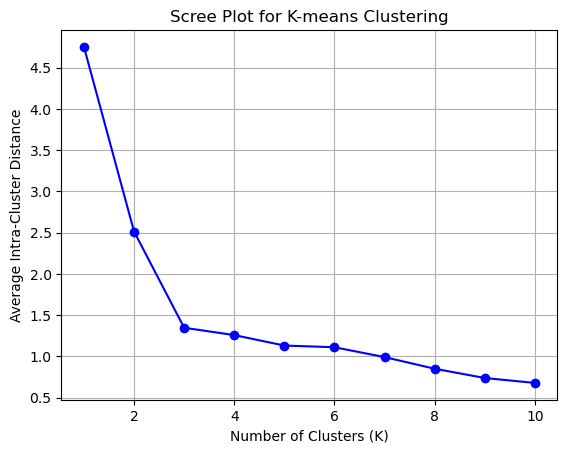

In [ ]:
from autograd import numpy as np
import matplotlib.pyplot as plt

def compute_average_intra_cluster_distance(data, centroids, assignments):
    total_distance = 0.0
    n_points = data.shape[0]
    
    for p in range(n_points):
        point = data[p]
        cluster_idx = assignments[p]
        centroid = centroids[cluster_idx]
        distance = np.linalg.norm(point - centroid)
        total_distance += distance
    
    avg_distance = total_distance / n_points
    return avg_distance

n_samples = data.shape[0]
max_k = min(10, n_samples)  

distance_values = []
k_values = range(1, max_k + 1)

np.random.seed(42)  

for k in k_values:
    initial_indices = np.random.choice(n_samples, k, replace=False)
    centroids = data[initial_indices]
    
    for _ in range(5):
        assignments = update_assignments(data, centroids)
        centroids = update_centroids(data, centroids, assignments)
    
    final_assignments = update_assignments(data, centroids)
    average_intra_cluster_distance = compute_average_intra_cluster_distance(data, centroids, final_assignments)
    distance_values.append(average_intra_cluster_distance)
    print(f"K={k}, Distance={average_intra_cluster_distance}")

plt.plot(k_values, distance_values, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Average Intra-Cluster Distance')
plt.title('Scree Plot for K-means Clustering')
plt.grid(True)
plt.show()